In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('checkpoint2_geocoded.csv')

In [3]:
df['Type'] = df['Type'].str.strip()

In [4]:
df['Type'].unique()

array(['ALARM/BURG', 'THREATS/PROG', 'TOW OF M/V', 'LOUD NOISE',
       'DOMESTIC/PAST', 'BUILDING CHK', 'NOISE ORD', 'HIT', 'MV/BLOCKING',
       'AUTO ACC/NO PI', 'DISTURBANCE', 'M/V STOP', 'UNWANTEDGUEST',
       'ALARMS', 'MEDIC SUPPORT', 'DISORDERLY', 'GENERAL SERV',
       'INVEST CONT', 'AUTO ACC/UNK PI', 'NEIGHBOR PROB', 'TOW/REPOSSED',
       'PARK', 'STOL/MV/PAS', 'TRESPASSING', 'WIRE DOWN', 'FRAUD',
       'LARCENY/PAST', 'ANIMAL COMPL', 'LOCKOUT', 'CK WELL BEING',
       'SUS PERS/MV', 'LIC PLATE STO', 'DOMESTIC/PROG', 'SEX OFF',
       'THREATS', 'ABAND MV', 'FIGHT', 'MAL DAMAGE', 'LOST PROPERTY',
       'SPECIAL CHECK', 'INVESTIGATION', 'NOTIFICATION',
       'SUICIDE ATTEMPT', 'ROBBERY ARMED', 'FIRE', '911 HANG UP',
       'KEEP PEACE', 'WARRANT SERVE', 'SHOTS FIRED', 'E911 HANGUP',
       'MISSING PERS', 'DRUG VIO', 'AUTO ACC/PI', '209A/SERVE',
       'RECOV/STOL/MV', 'MAN DOWN', 'LARCENY/MV/PAST', 'ASSIST FIRE',
       'VIO CITY ORD', 'WOMAN DOWN', 'ASSSIT OTHER PD', '

In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the display width
pd.set_option('display.max_colwidth', None)  # Show full content of each column
df['Type'].value_counts()

Type
M/V STOP           81464
BUILDING CHK       24379
NOISE ORD          23959
SUS PERS/MV        11899
ALARM/BURG         11869
TOW OF M/V         11588
DISTURBANCE        11059
AUTO ACC/NO PI     10908
EXTRA SURVEIL      10899
MEDIC SUPPORT      10556
SPECIAL CHECK      10494
209A/SERVE          7732
CK WELL BEING       7034
MV/BLOCKING         6507
INVEST CONT         5624
HIT                 5399
LOUD NOISE          4604
UNWANTEDGUEST       4506
KEEP PEACE          4391
911 HANG UP         4301
VIO CITY ORD        4023
PARK                3797
GENERAL SERV        3692
ANIMAL COMPL        3077
TOW/REPOSSED        2779
ALARMS              2732
LARCENY/PAST        2441
WARRANT SERVE       2399
MAL DAMAGE          2301
LOST PROPERTY       2068
BUSINESS CHK        2036
DOMESTIC/PROG       1944
INVESTIGATION       1891
TRESPASSING         1831
FIGHT               1796
MISSING PERS        1794
AUTO ACC/UNK PI     1739
DISORDERLY          1725
DRUG VIO            1688
MAN DOWN            

In [6]:
INCIDENT_CATEGORIES = {
    'MOTOR_VEHICLE_INCIDENTS': [
        'M/V STOP', 'AUTO ACC/NO PI', 'AUTO ACC/PED', 'AUTO ACC/PI', 'AUTO ACC/UNK PI',
        'DISABLED MV', 'TOW OF M/V', 'TOW/REPOSSED', 'TOW/TRESPASS', 'ABAND MV',
        'MV/BLOCKING', 'ROAD RAGE', 'DIRT BIKE', 'CRUISER ACCID', 'HIT',
        'LOCKOUT', 'STOL/MV/PAS', 'STOL/MV/PR', 'RECOV/STOL/MV', 'TOW/REC/STOL'
    ],

    'PREVENTIVE_POLICING': [
        'EXTRA SURVEIL', 'BUILDING CHK', 'BUSINESS CHK', 'PARK & WALK',
        'SPECIAL CHECK', 'SELECTIVE ENF', 'PARK'
    ],

    'PUBLIC_DISTURBANCES': [
        'DISTURBANCE', 'DISORDERLY', 'TRESPASSING', 'UNWANTEDGUEST',
        'NEIGHBOR PROB', 'VIO CITY ORD', 'LOUD NOISE', 'NOISE ORD',
        'DRINKING PUBL', 'PROSTITUTION', 'DK', 'ILLEGAL DUMPING', 'FIRE WORKS'
    ],

    'FIRE_AND_ARSON_INCIDENTS': [
        'FIRE', 'BUILDING FIRE', 'DUMPSTER FIRE', 'FIRE/MV', 'ALARM/BURG',
        'ALARM/HOLD', 'ALARM/BANK', 'ALARMS', 'ALARM OF FIRE', 'ALARM/MV',
        'ASSIST FIRE', 'ARSON/PAST', 'ARSON/PROG', 'ARSON/ATTEMPT'
    ],

    'DOMESTIC_DISPUTES_AND_PROTECTION': [
        '209A/SERVE', '209A/VIOLATION', 'EMERGENCY209A', 'VIO 209A',
        'KEEP PEACE', 'UNATENEDCHILD', 'DOMESTIC/PAST', 'DOMESTIC/PROG',
        'LANDLORD PROB'
    ],

    'SUSPICIOUS_AND_UNUSUAL_ACTIVITY': [
        'SUS PERS/MV', 'VIDEO EXT', 'GANG', 'ANNOYING CALLS'
    ],

    'LAW_ENFORCEMENT_OPERATIONS': [
        'INVESTIGATION', 'INVEST CONT', 'SRU - FOLLOW UP', 'SEARCHWARRANT',
        'BOLO', 'FOLLOW UP', 'DETAIL', 'ESCORT', 'OFFICER ASSIS',
        'MUTUAL AID', 'PURSUIT', 'RIVER PARTROL', 'ASSSIT OTHER PD',
        'TRANSPORT', 'PRISONER CHK', 'EVIDENCE TRAN', 'EVIDENCE PROPER',
        'DRONE DEPLOYMEN', 'OUTSIDE WORK', 'CRUISER MAINT', 'SEIZED PROP', 'SRU'
    ],

    'MEDICAL_AND_WELFARE_ASSISTANCE': [
        'CK WELL BEING', 'AMBULANCE ASSSI', 'ASSSIT AMBULANC',
        'MAN DOWN', 'WOMAN DOWN', 'SUICIDE ATTEMPT', 'MEDIC SUPPORT',
        'ELDER SERVICE', 'SOCIAL SERV', 'MISSING PERS', 'LOST PERSON'
    ],

    'PROPERTY_CRIMES': [
        'B&E/PAST', 'B&E/PROG', 'B&E/MV/PAST', 'B&E/MV/PROG',
        'LARCENY/PAST', 'LARCENY/PROG', 'LARCENY/MV/PAST', 'LARCENY/MV/PROG',
        'LARCENY/ATTMEPT', 'SHOPLIFTING', 'MAL DAMAGE', 'MAL DAMG PROG',
        'VALDALISM/PAST', 'VANDALISM/PROG', 'STOLEN PROP', 'FOUND PROPERTY',
        'LOST PROPERTY', 'LIC PLATE STO'
    ],

    'FINANCIAL_CRIMES_AND_FRAUD': [
        'COUNTERFEIT', 'FORGERY PAST', 'FORGERY PROG', 'UTTERING/PAST',
        'FRAUD', 'IDENTITY THEFT', 'BRIBERY'
    ],

    'VIOLENT_AND_WEAPON_OFFENSES': [
        'FIGHT', 'A&B PAST', 'A&B PROG', 'A&B D/W PAST', 'A&B D/W/ PROG',
        'THREATS', 'THREATS/PROG', 'HARASSMENT', 'STALKING', 'ACCOSTING',
        'CARJACKING', 'CHILD ABUSE', 'ELDERLY ABUSE', 'KIDNAP/PAST', 'KIDNAP/PROG',
        'RAPE', 'RAPE/PAST', 'SEX OFF', 'SEX OFFENDER', 'SEX OFF PROG',
        'SEX OFF. PAST', 'SEX OFF ADDRESS', 'SHOTS FIRED', 'GUN CALL',
        'SCHOOL WEAPON', 'SHOTSPOTTER', 'HOMICIDE', 'AUTO FATALITY',
        'DEATH SUDDEN', 'ROBBERY ARMED', 'ROBBERY PAST', 'ROBBERY UNARM', 'ROBBERY PROG', 'HOME INVASION'
    ],

    'DRUG_AND_SUBSTANCE_USE': [
        'DRUG INVEST', 'DRUG OVERDOSE', 'DRUG EVIDENCE', 'DRUG VIO'
    ],

    'COURT_AND_ADMIN_PROCEDURES': [
        'COURT DOC SERVE', 'COURT TIME', 'WARRANT SERVE',
        'SERVE SEC 12', 'SERVE SEC 35', 'GENERAL SERV',
        'FUNERAL ESCOR', 'STA RELIEF', 'INSERVICE TNG',
        'TRAINING', 'ALARM/EXCUSED'
    ],

    'OTHER': [
        'WIRE DOWN', 'ANIMAL COMPL', 'NOTIFICATION', '911 HANG UP',
        'E911 HANGUP', 'CLOSE STREET', 'TEST QED', 'UNKNOWN PROB',
        'TENANT PROB', 'CIVIL PROB', 'MISC', 'ADMININSTR',
        'BOMB SCARE', 'FIRE/HYD/OPEN', 'EXPLOSION', 'UNION BUSINES',
        'IA COMPLAINT', 'SCHOOL MEDIATIO', 'SCHOOL MEETING', 'OTHER AGENCY'
    ]
}

In [7]:
def create_reverse_mapping(categories):
    """Create a mapping from incident type to category."""
    reverse_map = {}
    for category, incidents in categories.items():
        for incident in incidents:
            reverse_map[incident] = category
    return reverse_map

In [8]:
# Create reverse mapping
incident_to_category = create_reverse_mapping(INCIDENT_CATEGORIES)

In [9]:
# Add category column
df['category'] = df['Type'].map(lambda x: incident_to_category.get(x, 'OTHER'))

In [10]:
df['category'].value_counts(normalize = True)

category
MOTOR_VEHICLE_INCIDENTS             0.355363
PUBLIC_DISTURBANCES                 0.155327
PREVENTIVE_POLICING                 0.145735
MEDICAL_AND_WELFARE_ASSISTANCE      0.067122
FIRE_AND_ARSON_INCIDENTS            0.048207
DOMESTIC_DISPUTES_AND_PROTECTION    0.046895
OTHER                               0.037673
SUSPICIOUS_AND_UNUSUAL_ACTIVITY     0.033590
LAW_ENFORCEMENT_OPERATIONS          0.030401
PROPERTY_CRIMES                     0.026380
COURT_AND_ADMIN_PROCEDURES          0.021252
VIOLENT_AND_WEAPON_OFFENSES         0.020411
DRUG_AND_SUBSTANCE_USE              0.008213
FINANCIAL_CRIMES_AND_FRAUD          0.003430
Name: proportion, dtype: float64

In [11]:
df[df['category']=='OTHER']['Type'].unique()

array(['WIRE DOWN', 'ANIMAL COMPL', 'NOTIFICATION', '911 HANG UP',
       'E911 HANGUP', 'CLOSE STREET', 'TEST QED', 'UNKNOWN PROB',
       'TENANT PROB', 'CIVIL PROB', 'MISC', 'ADMININSTR', 'BOMB SCARE',
       'FIRE/HYD/OPEN', 'EXPLOSION', 'UNION BUSINES', 'IA COMPLAINT',
       'SCHOOL MEDIATIO', 'SCHOOL MEETING', 'OTHER AGENCY'], dtype=object)

In [12]:
df['category'].value_counts()

category
MOTOR_VEHICLE_INCIDENTS             126815
PUBLIC_DISTURBANCES                  55430
PREVENTIVE_POLICING                  52007
MEDICAL_AND_WELFARE_ASSISTANCE       23953
FIRE_AND_ARSON_INCIDENTS             17203
DOMESTIC_DISPUTES_AND_PROTECTION     16735
OTHER                                13444
SUSPICIOUS_AND_UNUSUAL_ACTIVITY      11987
LAW_ENFORCEMENT_OPERATIONS           10849
PROPERTY_CRIMES                       9414
COURT_AND_ADMIN_PROCEDURES            7584
VIOLENT_AND_WEAPON_OFFENSES           7284
DRUG_AND_SUBSTANCE_USE                2931
FINANCIAL_CRIMES_AND_FRAUD            1224
Name: count, dtype: int64

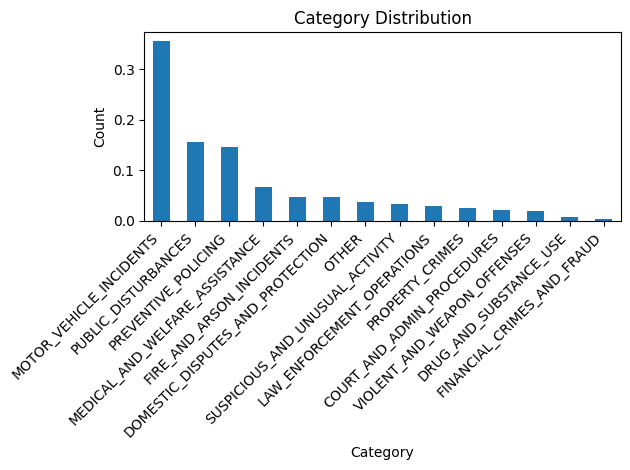

In [13]:
# Assuming you have a DataFrame with a 'category' column
df['category'].value_counts(normalize = True).plot(kind='bar')

# Add some styling to make it more readable
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

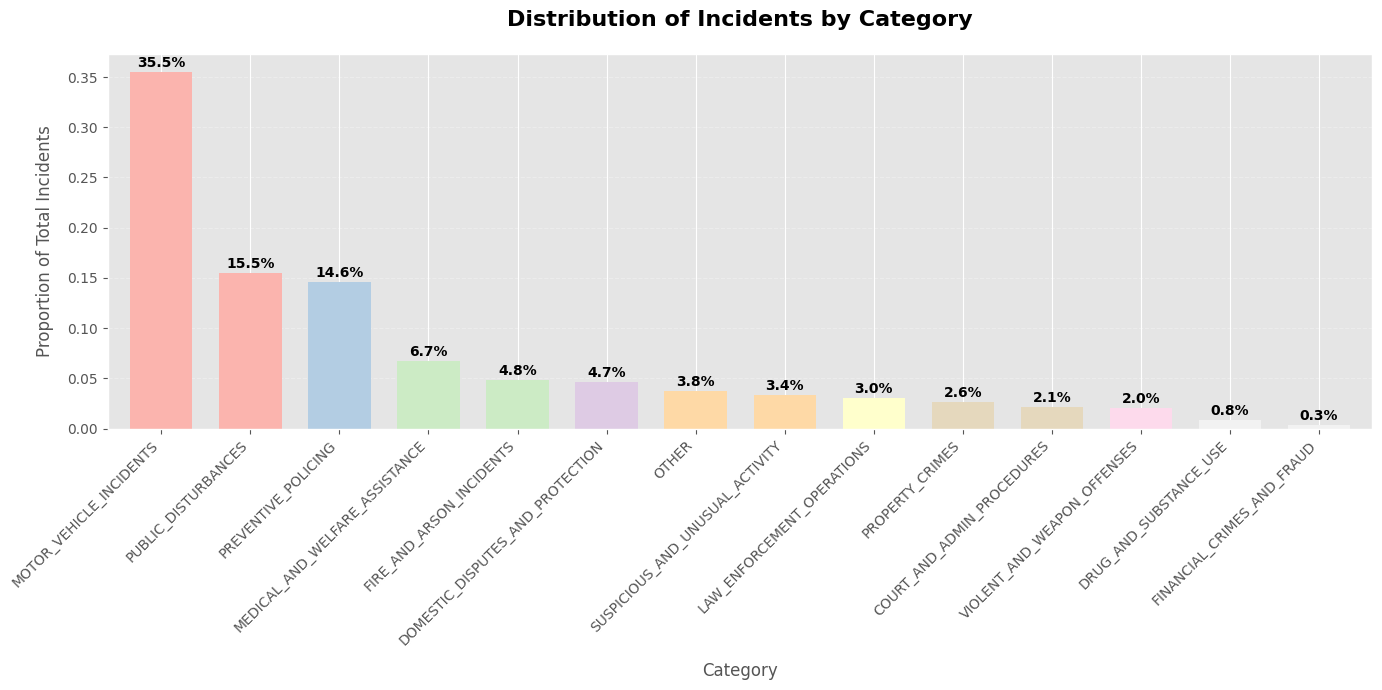

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

# Updated data
data = {
    'category': [
        'MOTOR_VEHICLE_INCIDENTS', 'PUBLIC_DISTURBANCES', 'PREVENTIVE_POLICING',
        'MEDICAL_AND_WELFARE_ASSISTANCE', 'FIRE_AND_ARSON_INCIDENTS',
        'DOMESTIC_DISPUTES_AND_PROTECTION', 'OTHER',
        'SUSPICIOUS_AND_UNUSUAL_ACTIVITY', 'LAW_ENFORCEMENT_OPERATIONS',
        'PROPERTY_CRIMES', 'COURT_AND_ADMIN_PROCEDURES',
        'VIOLENT_AND_WEAPON_OFFENSES', 'DRUG_AND_SUBSTANCE_USE',
        'FINANCIAL_CRIMES_AND_FRAUD'
    ],
    'value': [
        0.355363, 0.155327, 0.145735,
        0.067122, 0.048207, 0.046895, 0.037673,
        0.033590, 0.030401, 0.026380, 0.021252,
        0.020411, 0.008213, 0.003430
    ]
}

# Create DataFrame
plot_df = pd.DataFrame(data)

# Create figure
plt.figure(figsize=(14, 7))

# Generate pastel color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(plot_df)))

# Plot bar chart
ax = plot_df.set_index('category')['value'].plot(
    kind='bar',
    width=0.7,
    color=colors,
    edgecolor='none'
)

# Titles and labels
plt.title('Distribution of Incidents by Category', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Category', fontsize=12, labelpad=10)
plt.ylabel('Proportion of Total Incidents', fontsize=12, labelpad=10)

# X and Y tick customization
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on top of bars
for i, v in enumerate(plot_df['value']):
    ax.text(i, v + 0.002, f'{v:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Layout adjustment
plt.tight_layout()
plt.show()

In [15]:
print(df.columns)

Index(['Incident #', 'Date', 'Type', 'Location', 'Arrested', 'Location Prefix',
       'Name', 'DOB', 'Charges', 'Latitude', 'Longitude', 'category'],
      dtype='object')


In [16]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Prepare data for JavaScript
years = sorted(df['Year'].unique())

In [17]:
data_by_year = {}
for year in years:
    df_year = df[df['Year'] == year]
    category_props = df_year['category'].value_counts(normalize=True)

    type_props = {}
    for category in category_props.index:
        category_data = df_year[df_year['category'] == category]
        type_counts = category_data['Type'].value_counts(normalize=True)
        type_props[category] = {
            'types': type_counts.index.tolist(),
            'values': [float(x) for x in type_counts.values]
        }

    data_by_year[int(year)] = {
        'categories': category_props.index.tolist(),
        'values': [float(x) for x in category_props.values],
        'type_data': type_props
    }

In [20]:
import os

# Ensure the Figures directory exists
os.makedirs('../Figures', exist_ok=True)

In [ ]:
import json


html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Lawrence Police Daily Logs Dashboard</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500;700&display=swap" rel="stylesheet">
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: 'Roboto', sans-serif;
        }

        body {
            background-color: #f5f6fa;
            color: #2d3436;
        }

        .header {
            background: linear-gradient(135deg, #0c2461 0%, #1e3799 100%);
            color: white;
            padding: 2rem 0;
            margin-bottom: 2rem;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }

        .header h1 {
            text-align: center;
            font-size: 2.5rem;
            font-weight: 500;
        }

        .dashboard {
            max-width: 1400px;
            margin: 0 auto;
            padding: 0 20px;
        }

        .controls {
            background: white;
            padding: 1.5rem;
            border-radius: 10px;
            margin-bottom: 2rem;
            text-align: center;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.05);
        }

        .controls label {
            font-size: 1.1rem;
            margin-right: 1rem;
            font-weight: 500;
        }

        select {
            padding: 8px 16px;
            font-size: 1rem;
            border: 2px solid #dfe6e9;
            border-radius: 6px;
            width: 200px;
            background-color: white;
            cursor: pointer;
            transition: border-color 0.3s ease;
        }

        select:hover, select:focus {
            border-color: #74b9ff;
            outline: none;
        }

        .charts {
            display: grid;
            grid-template-columns: repeat(2, 1fr);
            gap: 2rem;
            margin-top: 20px;
        }

        .chart {
            background: white;
            border-radius: 10px;
            padding: 1.5rem;
            min-height: 650px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.05);
            display: flex;
            justify-content: center;
            align-items: center;
        }

        @media (max-width: 1200px) {
            .charts {
                grid-template-columns: 1fr;
            }
            .chart {
                min-height: 500px;
            }
        }

        @media (max-width: 768px) {
            .header h1 {
                font-size: 2rem;
            }
            .dashboard {
                padding: 0 10px;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Lawrence Police Daily Logs Dashboard</h1>
    </div>
    <div class="dashboard">
        <div class="controls">
            <label for="year-select">Select Year:</label>
            <select id="year-select"></select>
        </div>
        <div class="charts">
            <div class="chart" id="bar-chart"></div>
            <div class="chart" id="sunburst-chart"></div>
        </div>
    </div>

    <script>
        const dashboardData = """ + json.dumps(data_by_year) + """;
        let currentCategory = null;

        const yearSelect = document.getElementById('year-select');
        Object.keys(dashboardData).sort().forEach(year => {
            const option = document.createElement('option');
            option.value = year;
            option.textContent = year;
            yearSelect.appendChild(option);
        });

        function updateCharts(year) {
            const yearData = dashboardData[year];

            const barData = [{
                x: yearData.categories.map(cat => 
                cat.replace(/_/g, ' ').replace(/(.{15})/g, "$1<br>")
                ),
                y: yearData.values,
                type: 'bar',
                marker: {
                    color: yearData.categories.map(cat =>
                        cat === currentCategory ? '#3498db' : '#bdc3c7'
                    )
                },
                text: yearData.values.map(v => `${(v * 100).toFixed(1)}%`),
                textposition: 'auto'
            }];

            const barLayout = {
                title: {
                    text: `Distribution of Incidents by Category (${year})`,
                    font: { size: 16, color: '#2d3436', family: 'Roboto' }
                },
                xaxis: {
                    title: 'Category',
                    tickangle: -80,
                    gridcolor: '#f7f7f7'
                },
                yaxis: {
                    title: 'Percentage',
                    tickformat: ',.0%',
                    gridcolor: '#f7f7f7'
                },
                height: 650,
                margin: {t: 50, l: 50, r: 25, b: 100},
                paper_bgcolor: 'white',
                plot_bgcolor: 'white'
            };

            Plotly.newPlot('bar-chart', barData, barLayout);

            if (currentCategory) {
                updateSunburst(year, currentCategory);
            }

            document.getElementById('bar-chart').on('plotly_click', function(data) {
                const category = yearData.categories[data.points[0].pointIndex];
                currentCategory = category;
                updateSunburst(year, category);

                const update = {
                    'marker.color': [yearData.categories.map(cat =>
                        cat === category ? '#3498db' : '#bdc3c7'
                    )]
                };
                Plotly.restyle('bar-chart', update);
            });
        }

        function updateSunburst(year, category) {
            const typeData = dashboardData[year].type_data[category];
            const sunburstData = [{
                type: "sunburst",
                labels: [category].concat(typeData.types),
                parents: [""].concat(Array(typeData.types.length).fill(category)),
                values: [1].concat(typeData.values),
                textinfo: "label+percent parent",
                hovertemplate: 'Type: %{label}<br>Percentage: %{value:.1%}<extra></extra>',
                insidetextorientation: 'radial',
                maxdepth: 2,
                rotation: 90,
                branchvalues: 'total',
                marker: {
                    colors: ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#1abc9c', '#e67e22']
                }
            }];

            const sunburstLayout = {
                title: {
                    text: `Types within ${category} (${year})`,
                    font: { size: 16, color: '#2d3436', family: 'Roboto' },
                    y: 0.995,
                    x: 0.5,
                    xanchor: 'center',
                    yanchor: 'top'
                },
                height: 550,
                width: 550,
                margin: {t: 50, l: 0, r: 0, b: 0},
                showlegend: false,
                grid: {rows: 1, columns: 1},
                autosize: false,
                paper_bgcolor: 'white'
            };

            const config = {
                responsive: true,
                displayModeBar: false
            };

            Plotly.newPlot('sunburst-chart', sunburstData, sunburstLayout, config);
        }

        yearSelect.addEventListener('change', function() {
            updateCharts(this.value);
        });
        updateCharts(yearSelect.value);
    </script>
</body>
</html>
"""

# Save the HTML file
with open('../Figures/incident_dashboard.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("Dashboard has been saved as 'incident_dashboard.html'")

Dashboard has been saved as 'incident_dashboard.html'
